# Tensorflow
## Softmax Sample

In [1]:
import tensorflow as tf
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense
from keras.datasets import mnist

import numpy as np

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
model=Sequential([
    Dense(units=25,activation='relu'),
    Dense(units=15,activation='relu'),
    Dense(units=10,activation='linear')
])

In [3]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
tf.config.list_physical_devices('GPU')

Num GPUs Available:  0


[]

In [4]:
path = 'D:/Project/C++/01-VSCode Project/py-ml/data_train/mnist.npz'
(x_train,y_train),(x_show,y_test)=mnist.load_data(path=path)

print(x_train.shape,y_train.shape)
print(x_show.shape,y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [5]:
x_train=x_train.reshape(60000,784).astype('float32')/255.0
x_test=x_show.reshape(10000,784).astype('float32')/255.0


print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


In [6]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(loss=SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [7]:
model.fit(x_train,y_train,epochs=40)

Epoch 1/40
1875/1875 [==============================] - 21s 10ms/step - loss: 0.3876 - accuracy: 0.8895
Epoch 2/40
1875/1875 [==============================] - 27s 15ms/step - loss: 0.2077 - accuracy: 0.9399
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1717 - accuracy: 0.9498
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1482 - accuracy: 0.9572
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1332 - accuracy: 0.9612
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1237 - accuracy: 0.9643
Epoch 7/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1160 - accuracy: 0.9667
Epoch 8/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1105 - accuracy: 0.9682
Epoch 9/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1062 - accuracy: 0.9699
Epoch 10/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0

In [8]:
model.save(r'data_model/mnist_pre.h5')

In [9]:
k=30

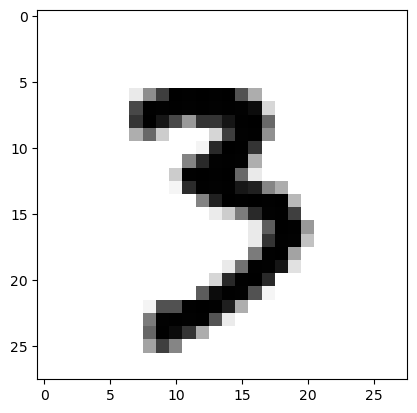

In [10]:
import matplotlib.pyplot as plt
plt.imshow(x_show[k],cmap="binary")
plt.show()

In [11]:
pre=x_test[k].reshape(1,784)
x_out=model(pre)
y_out=tf.nn.softmax(x_out)

In [12]:
print(y_out)

tf.Tensor(
[[1.6149400e-28 1.6011320e-13 6.5442527e-18 9.9997246e-01 4.9062076e-18
  1.0236166e-06 2.8464092e-29 5.5055954e-13 8.7206728e-11 2.6499409e-05]], shape=(1, 10), dtype=float32)


In [13]:
# find can replace by model.predict(pre)

n=0
tmp=0

for i in range(0,9):
    if(y_out[0][i]>n):
        tmp=i
        n=y_out[0][i]
        
print("predict:  ",tmp)
print("true:     ",y_test[k])

predict:   3
true:      3
